In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# load the census data

In [3]:
data1 = pd.read_csv("census-data-2000-2009.csv", sep=",", encoding='latin-1')

In [4]:
data1.head()

,sumlev,STATE,COUNTY,place,COUSUB,name,STATENAME,POPCENSUS_2000,POPBASE_2000,POP_2000,POP_2001,POP_2002,POP_2003,POP_2004,POP_2005,POP_2006,POP_2007,POP_2008,POP_2009
0,40,1,0,0,0,Alabama,Alabama,4447100,4447382,4451849,4464034,4472420,4490591,4512190,4545049,4597688,4637904,4677464,4708708
1,162,1,0,124,0,Abbeville city,Alabama,2987,2987,2987,2951,2939,2931,2936,2925,2926,2939,2931,2930
2,162,1,0,460,0,Adamsville city,Alabama,4965,5074,5069,5045,5008,4975,4925,4880,4851,4797,4789,4782
3,162,1,0,484,0,Addison town,Alabama,723,723,724,713,711,708,708,708,713,717,711,709
4,162,1,0,676,0,Akron town,Alabama,521,449,449,450,443,441,433,435,434,437,437,433


In [5]:
data2 = pd.read_csv("census-data-2010-2016.csv", sep=",", encoding='latin-1')

In [6]:
data2.head()

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016
0,40,1,0,0,0,0,0,A,Alabama,Alabama,4779736,4780131,4785492,4799918,4815960,4829479,4843214,4853875,4863300
1,162,1,0,124,0,0,0,A,Abbeville city,Alabama,2688,2688,2683,2685,2647,2631,2619,2616,2603
2,162,1,0,460,0,0,0,A,Adamsville city,Alabama,4522,4522,4517,4495,4472,4447,4428,4395,4360
3,162,1,0,484,0,0,0,A,Addison town,Alabama,758,756,754,753,748,748,747,740,738
4,162,1,0,676,0,0,0,A,Akron town,Alabama,356,356,355,345,345,342,337,337,334


# convert columns into rows...

In [7]:
data1t = pd.melt(data1, id_vars=["sumlev", "STATE", "COUNTY", "place", "COUSUB", "name", "STATENAME"],
                 var_name="Date", 
                 value_name="Value")

In [8]:
data2t = pd.melt(data2, id_vars=["SUMLEV", "STATE", "COUNTY", "PLACE", "COUSUB", "CONCIT", "PRIMGEO_FLAG", "FUNCSTAT", "NAME", "STNAME"], 
                 var_name="Date", 
                 value_name="Value")

In [9]:
data1t.head()

,sumlev,STATE,COUNTY,place,COUSUB,name,STATENAME,Date,Value
0,40,1,0,0,0,Alabama,Alabama,POPCENSUS_2000,4447100
1,162,1,0,124,0,Abbeville city,Alabama,POPCENSUS_2000,2987
2,162,1,0,460,0,Adamsville city,Alabama,POPCENSUS_2000,4965
3,162,1,0,484,0,Addison town,Alabama,POPCENSUS_2000,723
4,162,1,0,676,0,Akron town,Alabama,POPCENSUS_2000,521


In [10]:
data2t.head()

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,Date,Value
0,40,1,0,0,0,0,0,A,Alabama,Alabama,CENSUS2010POP,4779736
1,162,1,0,124,0,0,0,A,Abbeville city,Alabama,CENSUS2010POP,2688
2,162,1,0,460,0,0,0,A,Adamsville city,Alabama,CENSUS2010POP,4522
3,162,1,0,484,0,0,0,A,Addison town,Alabama,CENSUS2010POP,758
4,162,1,0,676,0,0,0,A,Akron town,Alabama,CENSUS2010POP,356


# select relevant rows

In [11]:
data1ts = data1t[(data1t.sumlev==162) & (data1t.Date.str.contains("POP_"))].copy()

In [12]:
data1ts.head()

,sumlev,STATE,COUNTY,place,COUSUB,name,STATENAME,Date,Value
163407,162,1,0,124,0,Abbeville city,Alabama,POP_2000,2987
163408,162,1,0,460,0,Adamsville city,Alabama,POP_2000,5069
163409,162,1,0,484,0,Addison town,Alabama,POP_2000,724
163410,162,1,0,676,0,Akron town,Alabama,POP_2000,449
163411,162,1,0,820,0,Alabaster city,Alabama,POP_2000,24099


In [13]:
data2ts = data2t[(data2t.SUMLEV==162) & (data2t.Date.str.contains("POPESTIMATE"))].copy()

In [14]:
data2ts.head()

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,Date,Value
163171,162,1,0,124,0,0,0,A,Abbeville city,Alabama,POPESTIMATE2010,2683
163172,162,1,0,460,0,0,0,A,Adamsville city,Alabama,POPESTIMATE2010,4517
163173,162,1,0,484,0,0,0,A,Addison town,Alabama,POPESTIMATE2010,754
163174,162,1,0,676,0,0,0,A,Akron town,Alabama,POPESTIMATE2010,355
163175,162,1,0,820,0,0,0,A,Alabaster city,Alabama,POPESTIMATE2010,31176


# standardize column set and column names

In [15]:
data1ts.drop(['sumlev','STATE','COUNTY','place','COUSUB'], axis=1, inplace=True)

In [16]:
data1ts.rename(columns={"name": "City", "STATENAME": "State"}, inplace=True)

In [17]:
data1ts.Date = data1ts.Date.str.replace("POP_", "")

In [18]:
data1ts.head()

,City,State,Date,Value
163407,Abbeville city,Alabama,2000,2987
163408,Adamsville city,Alabama,2000,5069
163409,Addison town,Alabama,2000,724
163410,Akron town,Alabama,2000,449
163411,Alabaster city,Alabama,2000,24099


In [19]:
data2ts.drop(['SUMLEV','STATE','COUNTY','PLACE','COUSUB','CONCIT','PRIMGEO_FLAG','FUNCSTAT'], axis=1, inplace=True)

In [20]:
data2ts.rename(columns={"NAME":"City", "STNAME":"State"}, inplace=True)

In [21]:
data2ts.Date = data2ts.Date.str.replace("POPESTIMATE", "")

In [22]:
data2ts.head()

,City,State,Date,Value
163171,Abbeville city,Alabama,2010,2683
163172,Adamsville city,Alabama,2010,4517
163173,Addison town,Alabama,2010,754
163174,Akron town,Alabama,2010,355
163175,Alabaster city,Alabama,2010,31176


# merge the two data sets together

In [23]:
len(data1ts)

195100

In [24]:
len(data2ts)

136570

In [25]:
len(data1ts)+len(data2ts)

331670

In [26]:
frames = [data1ts, data2ts]

In [27]:
data = pd.concat(frames)

In [28]:
len(data)

331670

# show some simple plots

In [29]:
cityName = "San Diego city"
stateName = "California"

In [30]:
cityData = data[(data.City==cityName) & (data.State==stateName)]

In [31]:
cityData

,City,State,Date,Value
166614,San Diego city,California,2000,1226804
248317,San Diego city,California,2001,1235642
330020,San Diego city,California,2002,1248417
411723,San Diego city,California,2003,1263423
493426,San Diego city,California,2004,1274878
575129,San Diego city,California,2005,1284347
656832,San Diego city,California,2006,1294071
738535,San Diego city,California,2007,1297624
820238,San Diego city,California,2008,1305754
901941,San Diego city,California,2009,1306300


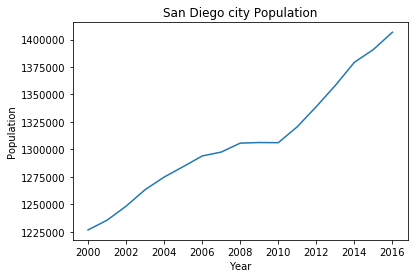

In [32]:
plt.plot(cityData.Date.astype('int'), cityData.Value)
plt.title("{} Population".format(cityName))
plt.ylabel("Population")
plt.xlabel("Year")

In [33]:
locations = [('Phoenix city', 'Arizona'), 
             ('Philadelphia city','Pennsylvania'), 
             ('San Antonio city', 'Texas'), 
             ('San Diego city','California'),
             ('Dallas city', 'Texas')]

In [34]:
data.columns

Index(['City', 'State', 'Date', 'Value'], dtype='object')

In [35]:
selection = pd.DataFrame(columns=data.columns)

In [36]:
selection

,City,State,Date,Value


In [37]:
for city, state in locations:
    query = data[(data.City==city) & (data.State==state)]
    frames = [selection, query]
    selection = pd.concat(frames)

In [38]:
print(selection.head(),"\n", selection.tail())

                City    State  Date    Value
164909  Phoenix city  Arizona  2000  1326997
246612  Phoenix city  Arizona  2001  1348132
328315  Phoenix city  Arizona  2002  1371454
410018  Phoenix city  Arizona  2003  1392602
491721  Phoenix city  Arizona  2004  1424000 
                City  State  Date    Value
397960  Dallas city  Texas  2012  1241624
479545  Dallas city  Texas  2013  1258016
561130  Dallas city  Texas  2014  1277376
642715  Dallas city  Texas  2015  1297327
724300  Dallas city  Texas  2016  1317929


# plot the city populations

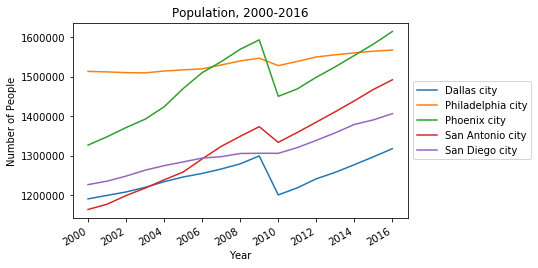

In [52]:
fig = plt.figure()
ax = plt.subplot(111)

legends = []
for key, grp in selection.groupby(['City']): 
    #print("key: {}, grp: {}".format(key, type(grp)))
    x = grp.Date # list([datetime.datetime.strptime(d,'%Y/%m').date() for d in grp.date.values])
    y = grp.Value # list(grp.value.values)
    ax.plot(x, y, label=key)
    legends.append(key)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Population, 2000-2016")
ax.set_ylabel("Number of People")
ax.set_xlabel("Year")
fig.autofmt_xdate()

plt.show()

# plot the city populations using log scale

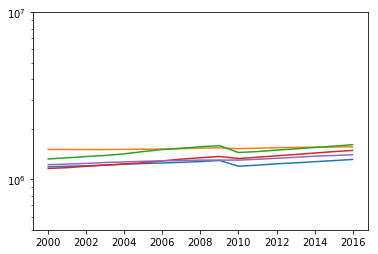

In [42]:
fig, ax = plt.subplots()

for key, grp in selection.groupby(['City']): 
    #print("key: {}, grp: {}".format(key, type(grp)))
    x = grp.Date # list([datetime.datetime.strptime(d,'%Y/%m').date() for d in grp.date.values])
    y = grp.Value # list(grp.value.values)
    ax.set_yscale('log')
    ax.set_ylim(500000, 10000000)
    ax.plot(x, y, label=key)

# plot city populations separately

key: Dallas city, grp: <class 'pandas.core.frame.DataFrame'>
key: Philadelphia city, grp: <class 'pandas.core.frame.DataFrame'>
key: Phoenix city, grp: <class 'pandas.core.frame.DataFrame'>
key: San Antonio city, grp: <class 'pandas.core.frame.DataFrame'>
key: San Diego city, grp: <class 'pandas.core.frame.DataFrame'>


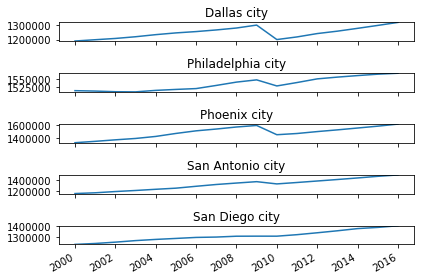

In [43]:
import matplotlib.dates as mdates

fig, axs = plt.subplots(5, sharex=True)
fig.subplots_adjust(hspace=5.0)

count = 0
for key, grp in selection.groupby(['City']): 
    print("key: {}, grp: {}".format(key, type(grp)))
    x = grp.Date # list([datetime.datetime.strptime(d,'%Y/%m').date() for d in grp.date.values])
    y = grp.Value # list(grp.value.values)
    ax = axs[count]
    ax.plot(x, y, label=key)
    ax.set_ylim(min(y), max(y))
    ax.fmt_xdata = mdates.DateFormatter('%Y')
    ax.set_title("{}".format(key))
    #ax.legend(key, loc='upper right', bbox_to_anchor=(1.2, 1.15))
    count += 1

fig.autofmt_xdate()
fig.tight_layout()
plt.show()

key: Dallas city, grp: <class 'pandas.core.frame.DataFrame'>
key: Philadelphia city, grp: <class 'pandas.core.frame.DataFrame'>
key: Phoenix city, grp: <class 'pandas.core.frame.DataFrame'>
key: San Antonio city, grp: <class 'pandas.core.frame.DataFrame'>
key: San Diego city, grp: <class 'pandas.core.frame.DataFrame'>


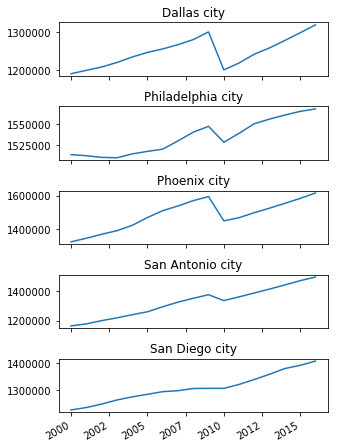

In [44]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.ticker import FormatStrFormatter

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

fig = plt.figure(figsize=(4.8, 6.4))

count = 1
for key, grp in selection.groupby(['City']): 
    print("key: {}, grp: {}".format(key, type(grp)))
    x = grp.Date  # list([datetime.datetime.strptime(d,'%Y/%m').date() for d in grp.date.values])
    y = grp.Value # list(grp.value.values)
    plt.subplot(5, 1, count)
    plt.title("{}".format(key))
    plt.plot(x, y)
    count += 1

fig.autofmt_xdate()
fig.tight_layout()
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d')) 
plt.show()

# look at population as growth rate

key: Baltimore city, grp: <class 'pandas.core.frame.DataFrame'>
key: Boston city, grp: <class 'pandas.core.frame.DataFrame'>
key: New York city, grp: <class 'pandas.core.frame.DataFrame'>
key: Philadelphia city, grp: <class 'pandas.core.frame.DataFrame'>
key: Washington city, grp: <class 'pandas.core.frame.DataFrame'>


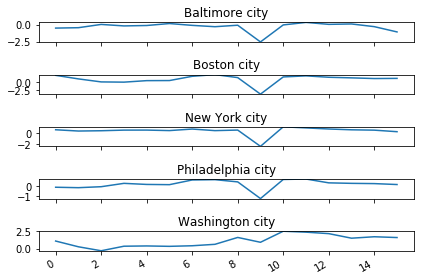

In [263]:
import matplotlib.dates as mdates

fig, axs = plt.subplots(5, sharex=True)
fig.subplots_adjust(hspace=5.0)

count = 0
for key, grp in selection.groupby(['City']): 
    print("key: {}, grp: {}".format(key, type(grp)))
    # x = grp.Date # list([datetime.datetime.strptime(d,'%Y/%m').date() for d in grp.date.values])
    # y = grp.Value # list(grp.value.values)
    deltas = (grp.Value.values[1:] - grp.Value.values[:-1])*100.0
    y = deltas / grp.Value.values[:-1]
    x = np.arange(len(y))
    ax = axs[count]
    ax.plot(x, y, label=key)
    ax.set_ylim(min(y), max(y))
    ax.fmt_xdata = mdates.DateFormatter('%Y')
    ax.set_title("{}".format(key))
    #ax.legend(key, loc='upper right', bbox_to_anchor=(1.2, 1.15))
    count += 1

fig.autofmt_xdate()
fig.tight_layout()
plt.show()